In [69]:
import numpy as np

def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

def sigmoid(x):
    return 1/(np.exp(-x)+1)    

def d_sigmoid(x):
    return sigmoid(x)*(np.ones(x.shape[0])-sigmoid(x))
    
class MLP(): 
    def __init__(self, nHidden, epoch=25, eta=0.0005):
        self.nHidden = nHidden
        self.epoch = epoch
        self.eta = eta
        self.error = []
        self.accuracy = []
        self.terror = []
        self.taccuracy = []

    def _initialize_weights(self, X, y):
        n_features = X.shape[1]
        n_outputs = y.shape[1]
        # Hidden layer
        self.W  = np.random.uniform(-0.003, 0.003, (n_features, self.nHidden))
        self.w0 = np.zeros(self.nHidden)
        # Output layer
        self.V = np.random.uniform(-0.003, 0.003, (self.nHidden, n_outputs))
        self.v0 = np.zeros(n_outputs)

    def fit(self, X, y,test,y_test):

        self._initialize_weights(X, y)
        err = 0
        ac = 0
        su = 0
        terr = 0
        for ep in range(self.epoch):
            print(ep,"out of",self.epoch,"error:",err/2, "accuracy:",ac,"terror:",terr/2,"tacc:",su/test.shape[0])  
            err = 0
            ac = 0
            su = 0
            terr = 0
            for t in range(X.shape[0]):

                #  Forward Pass
                # HIDDEN LAYER
                hidden_input = X[t].dot(self.W) - self.w0
                hidden_output = sigmoid(hidden_input) 

                # OUTPUT LAYER
                output_layer_input = hidden_output.dot(self.V) - self.v0
                y_pred = sigmoid(output_layer_input)

                err += sum((y[t]-y_pred)**2)

                err += sum((y[t]-y_pred)**2)

                if np.argmax(y_pred) == np.argmax(y[t]):
                    ac += 1

                #  Backward Pass
                # OUTPUT LAYER
                deltaO = (y[t]-y_pred)*(y_pred*(np.ones(y_pred.shape[0]) - y_pred))

                # HIDDEN LAYER
                deltaW = (self.V.dot(deltaO))*(hidden_output*(np.ones(hidden_output.shape[0])-hidden_output))

                self.V += self.eta*np.outer(hidden_output,deltaO)
                self.v0 += self.eta * deltaO

                self.W += self.eta*np.outer(X[t],deltaW)
                self.w0 += self.eta * deltaW

            self.accuracy.append(ac/X.shape[0])
            self.error.append(err)
            
            for i in range(test.shape[0]):
                yt_pred = self.predict(test[i])
                terr += sum((y_test[i]-yt_pred)**2)
                if np.argmax(yt_pred) == np.argmax(y_test[i]):
                    su += 1
            self.taccuracy.append(su/test.shape[0])
            self.terror.append(terr/2)


    # Use the trained model to predict labels of X
    def predict(self, X):
        # Forward pass:
        # HIDDEN LAYER
        hidden_input = X.dot(self.W) - self.w0
        hidden_output = sigmoid(hidden_input)

        # OUTPUT LAYER
        output_layer_input = hidden_output.dot(self.V) - self.v0
        y_pred = sigmoid(output_layer_input)
        return y_pred

In [70]:
import tensorflow as tf
import keras
tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [71]:
y = np.zeros((y_train.shape[0],10))
for idx in range(y_train.shape[0]):
    y[idx][y_train[idx]] = 1

yt = np.zeros((y_test.shape[0],10))
for idx in range(y_test.shape[0]):
    yt[idx][y_test[idx]] = 1

xt = x_test.reshape(x_test.shape[0],784)
    
model = MLP(150)
model.fit(x_train.reshape(x_train.shape[0],784),y,xt,yt)

0 out of 25 error: 0.0 accuracy: 0 terror: 0.0 tacc: 0.0
1 out of 25 error: 44533.069383650254 accuracy: 29738 terror: 2414.138022419739 tacc: 0.8223
2 out of 25 error: 20483.858116268115 accuracy: 52950 terror: 1273.8744998359152 tacc: 0.902
3 out of 25 error: 13384.215551559242 accuracy: 54632 terror: 964.6326019615796 tacc: 0.9142
4 out of 25 error: 10934.282041785236 accuracy: 55053 terror: 842.3373458482292 tacc: 0.9218
5 out of 25 error: 9689.343881458386 accuracy: 55445 terror: 766.4973695480464 tacc: 0.9234
6 out of 25 error: 8903.138058251363 accuracy: 55663 terror: 710.2058982920094 tacc: 0.9266
7 out of 25 error: 8350.821843901576 accuracy: 55823 terror: 669.7901537101726 tacc: 0.931
8 out of 25 error: 7957.5800926238735 accuracy: 55976 terror: 652.8851541431569 tacc: 0.9299


C:\Users\janah\AppData\Local\Temp\ipykernel_28340\3394261778.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(-x)+1)


9 out of 25 error: 7654.6701638531795 accuracy: 56028 terror: 626.1598550916394 tacc: 0.9335
10 out of 25 error: 7336.574401333255 accuracy: 56195 terror: 625.1874393790604 tacc: 0.9326
11 out of 25 error: 7122.761322442462 accuracy: 56344 terror: 602.4160832054671 tacc: 0.9337
12 out of 25 error: 6927.848329702998 accuracy: 56395 terror: 571.9402582511166 tacc: 0.9389
13 out of 25 error: 6635.23740206318 accuracy: 56515 terror: 570.873786977686 tacc: 0.9354
14 out of 25 error: 6416.136723362255 accuracy: 56663 terror: 554.6792430219881 tacc: 0.9377
15 out of 25 error: 6315.2804803649 accuracy: 56649 terror: 524.7743137243193 tacc: 0.9424
16 out of 25 error: 6171.414307898177 accuracy: 56736 terror: 526.6129210210702 tacc: 0.9419
17 out of 25 error: 6035.381749814307 accuracy: 56852 terror: 525.8939846348625 tacc: 0.9419
18 out of 25 error: 5883.110660837539 accuracy: 56905 terror: 523.5717883401735 tacc: 0.9432
19 out of 25 error: 5817.702841593462 accuracy: 56943 terror: 504.69310981

[0.8223, 0.902, 0.9142, 0.9218, 0.9234, 0.9266, 0.931, 0.9299, 0.9335, 0.9326, 0.9337, 0.9389, 0.9354, 0.9377, 0.9424, 0.9419, 0.9419, 0.9432, 0.9442, 0.9451, 0.9463, 0.9465, 0.9482, 0.9477, 0.9484]


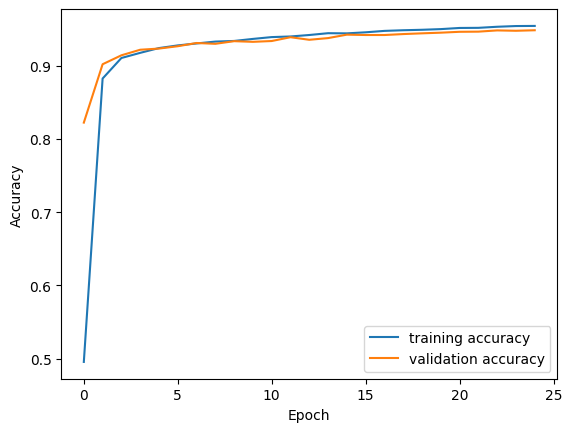

In [72]:
import matplotlib.pyplot as plt

x = []
for i in range(25):
    x.append(i)


print(model.taccuracy)
plt.plot(x,model.accuracy,label='training accuracy')
plt.plot(x,model.taccuracy,label='validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

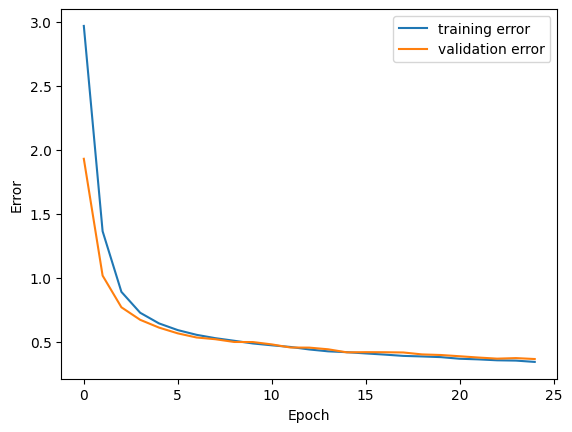

In [73]:
import matplotlib.pyplot as plt

x = []
for i in range(25):
    x.append(i)
te = []
for i in model.terror:
    te.append(np.mean(i)/(10*125))
plt.plot(x,np.array(model.error)/30000,label='training error')
plt.plot(x,te,label='validation error')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()